Medoids

In [1]:
%load_ext google.cloud.bigquery
%matplotlib inline
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [26]:
sql = '''
SELECT *  FROM `eth-tokens.alldata.clean_avg` LIMIT 20000
'''

df = client.query(sql).to_dataframe()

In [27]:
#remove address (string) from analysis
data = df.iloc[:,1:]

In [28]:
num_features = data.shape[1]
num_clusters = 12

In [29]:
scale = StandardScaler()
pca =PCA(n_components=num_features)

#build pipeline
pipe = Pipeline([('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data)





In [30]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import kmedoids


# distance matrix
D = pairwise_distances(results, metric='euclidean')

# split into 4 clusters
M, C = kmedoids.kMedoids(D, num_clusters)



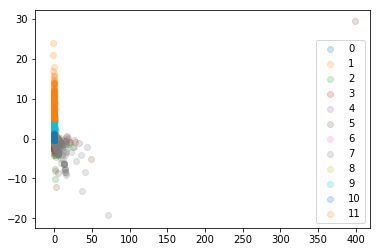

In [31]:
#plot k medoids clusters against two principal components
for lbl in C:
    a = results[C[lbl]]
    plt.scatter(a[:,0],a[:,1], label = lbl, alpha=.2)
plt.legend()
# plt.xlim(0,20)
# plt.ylim(-10,10)

In [32]:
#get medoids
m = results[M]
#transform back to real numbers
medoids = scale.inverse_transform(pca.inverse_transform(m))
pd.DataFrame(medoids, columns = data.columns)

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns
0,6.0,8.0,21.423514,3.570586,4290.747234,715.124539,21.424472,2.678059,4294.104989,536.763124,...,10.711757,2145.373617,10.712236,2147.052494,1.214306e-15,3.721468e-13,1.991454e+05,2.260487e+05,2.201420e+05,2.169749e+05
1,12.0,13.0,40.386606,3.365551,10238.394340,853.199528,40.387900,3.106762,10285.084271,791.160329,...,10.096652,2559.598585,10.096975,2571.271068,9.367507e-16,3.108624e-13,4.867466e+05,4.805948e+05,5.442946e+05,5.485683e+05
2,19.0,24.0,72.986768,3.841409,15658.479318,824.130490,73.001102,3.041713,15242.366985,635.098624,...,36.493384,7829.239659,36.500551,7621.183493,1.276756e-15,3.641532e-13,1.302955e+05,1.604788e+05,1.543753e+05,1.691199e+05
3,27.0,41.0,30.167703,1.117322,13083.696685,484.581359,32.845499,0.801110,15145.849502,369.410963,...,3.351967,1453.744076,3.649500,1682.872167,1.665335e-16,2.664535e-14,4.751334e+05,5.699694e+05,6.935788e+05,8.094788e+05
4,3.0,3.0,5.738215,1.912738,4029.621557,1343.207186,5.740000,1.913333,4033.779800,1344.593267,...,0.478185,335.801796,0.478333,336.148317,1.110223e-16,1.865175e-14,2.333304e+06,2.434222e+06,2.333276e+06,2.333145e+06
5,70.0,87.0,353.582279,5.051175,168941.084412,2413.444063,353.613949,4.064528,167312.098576,1923.127570,...,25.255877,12067.220315,25.258139,11950.864184,-6.245005e-16,-2.531308e-13,3.924398e+05,6.530051e+05,4.015655e+05,6.408194e+05
6,3.0,3.0,5.741918,1.913973,4233.296470,1411.098823,5.752800,1.917600,4241.181022,1413.727007,...,0.478493,352.774706,0.479400,353.431752,-1.387779e-16,-1.358913e-13,2.441585e+05,1.576021e+05,2.449075e+05,1.562883e+05
7,3.0,3.0,100.998677,33.666226,79744.528714,26581.509571,101.000000,33.666667,79384.990000,26461.663333,...,8.416556,6645.377393,8.416667,6615.415833,-7.424616e-16,-2.033929e-13,6.650000e+01,9.192388e+00,2.545000e+02,2.637508e+02
8,4.0,4.0,10.760266,2.690067,3365.570923,841.392731,10.763000,2.690750,3345.513990,836.378497,...,0.672517,210.348183,0.672687,209.094624,-1.595946e-16,-8.437695e-14,1.149176e+06,1.748536e+06,6.071444e+06,7.663228e+06
9,4.0,4.0,3.781361,0.945340,2464.486705,616.121676,3.792018,0.948005,2683.649689,670.912422,...,0.236335,154.030419,0.237001,167.728106,-2.775558e-17,-4.352074e-14,5.183535e+06,5.996396e+06,5.266848e+06,4.358658e+06
